# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
A = np.random.randint(0, 100, size=(200, 50))
A

array([[81, 71,  8, ..., 87,  2, 69],
       [ 2,  9, 57, ..., 80, 57, 82],
       [12, 32, 58, ..., 51, 50, 13],
       ...,
       [91, 57, 61, ..., 44, 29, 18],
       [77, 13, 45, ..., 15, 41, 21],
       [77, 88, 96, ..., 77, 22, 66]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [10]:
A = np.random.randint(0, 100, size=(4, 5))
perm = np.random.permutation(A.shape[1])
A_perm = A[:, perm]

print(A, "\n")
print(A_perm)

[[70 10 64 24 60]
 [62 54 23 81 63]
 [42 97 81 31 43]
 [72 51 11 46 75]] 

[[10 70 24 60 64]
 [54 62 81 63 23]
 [97 42 31 43 81]
 [51 72 46 75 11]]


# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [11]:
A = np.random.randint(0, 100, size=(4, 5))

#Суммы по четным и нечетным столбцам
sum_of_even_cols = np.sum(A[:, ::2], axis=1)
sum_of_odd_cols = np.sum(A[:, 1::2], axis=1)

#Среднее значение суммы элементов по нечетным столбцам
mean_of_odd_cols = np.mean(sum_of_odd_cols)

#Выбираем столбцы, удовлетворяющие условию
new_rows = A[sum_of_even_cols > mean_of_odd_cols]

print("Среднее значение суммы элементов по нечетным столбцам:", mean_of_odd_cols)
print("Сумма элементов по четным столбцам:", sum_of_even_cols)

print("\nИсходный массив A:")
print(A)
print("\nПодходящие строки:")
print(new_rows)

Среднее значение суммы элементов по нечетным столбцам: 56.0
Сумма элементов по четным столбцам: [155 165 180 104]

Исходный массив A:
[[47 31 35 35 73]
 [55 10 51 65 59]
 [46 17 61  1 73]
 [45 65 14  0 45]]

Подходящие строки:
[[47 31 35 35 73]
 [55 10 51 65 59]
 [46 17 61  1 73]
 [45 65 14  0 45]]


# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [12]:
A = np.random.randint(0, 100, size=(4, 5))
row_diff = np.max(A, axis=1) - np.min(A, axis=1)
result = np.argmax(row_diff)

print(A)
print("\nРазница:", row_diff)
print("Искомый индекс:", result)

[[84 71 31 82 47]
 [60 52 56 70 94]
 [16 86 47 33 92]
 [51 14 42  4 34]]

Разница: [53 42 76 47]
Искомый индекс: 2


# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [13]:
A = np.random.randint(0, 100, size=(2, 3))
A_flat = A.flatten()

A_flat_sorted = np.argsort(A_flat, kind='stable', axis=-1)
A_flat_sorted2 = np.argsort(A_flat_sorted, kind='stable', axis=-1) 
result = np.resize(A_flat_sorted2, (np.shape(A)))

print("Исходная матрица:\n", A)
print("Отсортированная:\n", result)

Исходная матрица:
 [[91 62 19]
 [93  1  2]]
Отсортированная:
 [[4 3 2]
 [5 0 1]]


# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [14]:
A = np.random.randint(0, 100, size=(4, 5))
min_vals = np.min(A, axis=1, keepdims=True)
max_vals = np.max(A, axis=1, keepdims=True)
result = (A - min_vals) / (max_vals - min_vals)

print("Массив A:\n", A)
print("Нормализованный массив:\n", result)

Массив A:
 [[45  2  4 22 99]
 [92  7 19 69 38]
 [ 9 18 66  2 35]
 [15 99  5 78 30]]
Нормализованный массив:
 [[0.44329897 0.         0.02061856 0.20618557 1.        ]
 [1.         0.         0.14117647 0.72941176 0.36470588]
 [0.109375   0.25       1.         0.         0.515625  ]
 [0.10638298 1.         0.         0.77659574 0.26595745]]


# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [15]:
n = 10
A = np.random.randint(0, 100, size=(200, 50))
result = np.linspace(A, A * n, n)

print(A)
print("\nНовый массив:", np.shape(result))
print(result)

[[26 25 14 ...  8 13 49]
 [11 71 15 ... 22 56 66]
 [80 91  7 ... 22 32 87]
 ...
 [99 74  6 ...  1 12 11]
 [33 32 80 ... 59 20 82]
 [23 12  5 ... 55  5 85]]

Новый массив: (10, 200, 50)
[[[ 26.  25.  14. ...   8.  13.  49.]
  [ 11.  71.  15. ...  22.  56.  66.]
  [ 80.  91.   7. ...  22.  32.  87.]
  ...
  [ 99.  74.   6. ...   1.  12.  11.]
  [ 33.  32.  80. ...  59.  20.  82.]
  [ 23.  12.   5. ...  55.   5.  85.]]

 [[ 52.  50.  28. ...  16.  26.  98.]
  [ 22. 142.  30. ...  44. 112. 132.]
  [160. 182.  14. ...  44.  64. 174.]
  ...
  [198. 148.  12. ...   2.  24.  22.]
  [ 66.  64. 160. ... 118.  40. 164.]
  [ 46.  24.  10. ... 110.  10. 170.]]

 [[ 78.  75.  42. ...  24.  39. 147.]
  [ 33. 213.  45. ...  66. 168. 198.]
  [240. 273.  21. ...  66.  96. 261.]
  ...
  [297. 222.  18. ...   3.  36.  33.]
  [ 99.  96. 240. ... 177.  60. 246.]
  [ 69.  36.  15. ... 165.  15. 255.]]

 ...

 [[208. 200. 112. ...  64. 104. 392.]
  [ 88. 568. 120. ... 176. 448. 528.]
  [640. 728.  56. ... 176

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [16]:
A = np.random.randint(0, 100, size=(3, 6))

#(Нумерация с нулевого столбца)
even_cols = A[:, ::2]
odd_cols = A[:, 1::2]
result = np.concatenate((even_cols, odd_cols), axis=1)

print("Массив A:")
print(A)
print("\nНовый массив:")
print(result)

Массив A:
[[ 1 64 47  7 34 32]
 [91 94 58 27 75 92]
 [15 15 75 88 72 94]]

Новый массив:
[[ 1 47 34 64  7 32]
 [91 58 75 94 27 92]
 [15 75 72 15 88 94]]


# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [17]:
A = np.random.randint(0, 50, size=(5, 3))
result = np.sum(np.all(A > 5, axis=1))
print(A)
print("Количество строк:", result)

[[ 2 49 10]
 [36 42  6]
 [ 5 28 28]
 [48  5 42]
 [ 7 41 14]]
Количество строк: 2


# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [18]:
A = np.random.randint(0, 100, size=(200, 50))
split_A = np.split(A, 10, axis=0)
result = np.mean(split_A, axis=0)

print(np.shape(A))
print(np.shape(split_A))
print(np.shape(result))

(200, 50)
(10, 20, 50)
(20, 50)


# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [19]:
A = np.random.randint(0, 10, size=(3, 5))
vals, idx = np.unique(A, return_index=True)
result = vals[np.argsort(idx)]

print("Массив:\n", A)
print("Значения в порядке появления:", result)

Массив:
 [[1 1 4 6 5]
 [8 5 5 2 4]
 [4 5 4 0 1]]
Значения в порядке появления: [1 4 6 5 8 2 0]


# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [20]:
A = np.random.randint(0, 100, size=(200, 50))
mean_row = np.mean(A, axis=0)
res = np.array(np.linalg.norm(A - mean_row, axis=1))
np.shape(res)

(200,)

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [21]:
A = np.random.randint(0, 100, size=(4, 4))
result = np.where(A < 50, A * 2, A * 3)

print("Массив A:")
print(A)
print("Новый массив:")
print(result)

Массив A:
[[30 93  7 21]
 [32 66 78 25]
 [ 1  8 19 28]
 [29 85 15 76]]
Новый массив:
[[ 60 279  14  42]
 [ 64 198 234  50]
 [  2  16  38  56]
 [ 58 255  30 228]]


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [32]:
A = np.random.randint(0, 100, size=(200, 50))
flattened_A = A.flatten()

def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    res = np.convolve(data, window, mode='valid')
    return res

# Вычисляем скользящие средние с окнами 3, 5 и 10
window_sizes = [3, 5, 10]
moving_avgs = [moving_average(flattened_A, window_size) for window_size in window_sizes]

# Найдем максимальную длину скользящих средних
max_length = max(len(avg) for avg in moving_avgs)

# Выравниваем их по максимальной длине, добавляя нули справа
aligned_moving_avgs = [np.pad(avg, (0, max_length - len(avg)), 'constant', constant_values=(0, 0)) for avg in moving_avgs]

# Находим сумму выровненных скользящих средних
sum_of_moving_avgs = np.sum(aligned_moving_avgs, axis=0)
print("Сумма скользящих средних:", sum_of_moving_avgs)
print(len(sum_of_moving_avgs))

Сумма скользящих средних: [129.16666667 136.46666667 157.53333333 ...  77.13333333  35.33333333
  28.33333333]
9998


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

/var/folders/md/1x4hwqds2gv4pztv494qc23r0000gn/T/ipykernel_5832/1852376592.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6)


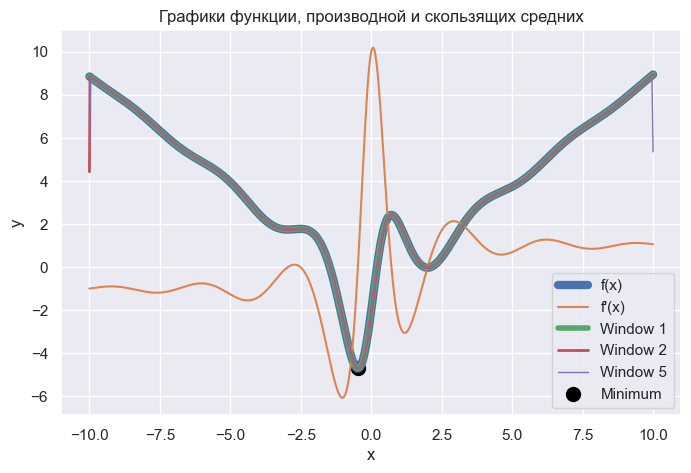

In [23]:
from scipy.misc import derivative
from scipy.optimize import minimize

def f(x):
    return (5 * np.sin(2 * x) - np.cos(2 * x) - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

def f_prime(x):
    return derivative(f, x, dx=1e-6)

x = np.linspace(-10, 10, 1000)
y = f(x)
y_prime = f_prime(x)
min_result = minimize(f, x0=0)

moving_agv_1 = np.convolve(y, np.ones(1)/1, mode='same')
moving_agv_2 = np.convolve(y, np.ones(2)/2, mode='same')
moving_agv_5 = np.convolve(y, np.ones(5)/5, mode='same')


plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x)', linewidth=6)
plt.plot(x, y_prime, label="f'(x)")
plt.plot(x, moving_agv_1, label='Window 1', linewidth=4)
plt.plot(x, moving_agv_2, label='Window 2', linewidth=2)
plt.plot(x, moving_agv_5, label='Window 5', linewidth=1)
plt.scatter(min_result.x, min_result.fun, color='black', marker='o', label='Minimum', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Графики функции, производной и скользящих средних')
plt.grid(True)
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [24]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [25]:
from scipy.stats import chisquare

def new_sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    cum_sum_x = np.cumsum(x)
    vals = np.random.random(c) * cum_sum_x[-1]

    # Нахождение первого такого индекса, что vals < кумулятивной суммы
    res = np.argmax(vals[:, np.newaxis] < cum_sum_x, axis=1)

    return res.tolist()

x = [50, 3, 1, 7, 20]
c = 100000

samples = sample(x, c)
new_samples = new_sample(x, c)

hist, _ = np.histogram(samples, bins=len(x))
new_hist, _ = np.histogram(new_samples, bins=len(x))

# Сравнение гистограмм
chi2_stat, p_value = chisquare(f_obs=hist, f_exp=new_hist)

if p_value < 0.05:
    print(f"Различия между двумя выборками статистически значимы: p-value = {p_value}")
else:
    print(f"Не можем отвергнуть гипотезу о случайной природе полученных различий: p-value = {p_value}")

Не можем отвергнуть гипотезу о случайной природе полученных различий: p-value = 0.2851222266216554


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [26]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1963

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

Время выполнения оригинального алгоритма: 1.7668 секунд
Время выполнения оптимизированного алгоритма: 0.1180 секунд


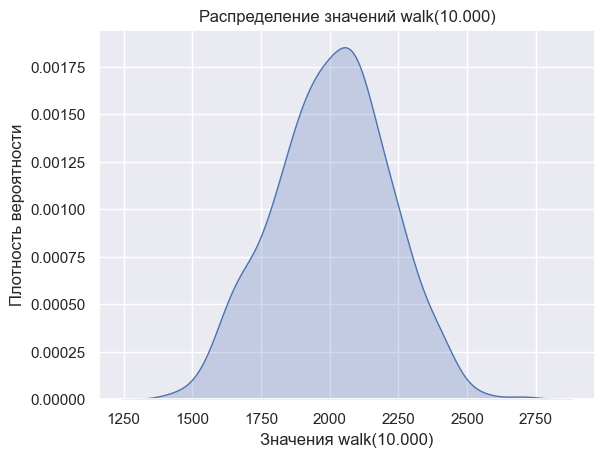

In [27]:
import random
import timeit
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def new_walk(n: int):
    choices = np.random.choice([-3, -1, 0, 2, 3], n)
    all_positions = np.cumsum(choices)
    return all_positions[-1]

n = 10_000
num_samples = 500

def time_walk():
    return [walk(n) for _ in range(num_samples)]

def time_new_walk():
    return [new_walk(n) for _ in range(num_samples)]

time = timeit.timeit(time_walk, number=1)
new_time = timeit.timeit(time_new_walk, number=1)

print(f"Время выполнения оригинального алгоритма: {time:.4f} секунд")
print(f"Время выполнения оптимизированного алгоритма: {new_time:.4f} секунд")

# Генерируем выборку и строим график распределения
samples = [new_walk(n) for _ in range(num_samples)]

sns.kdeplot(samples, fill=True)
plt.xlabel("Значения walk(10.000)")
plt.ylabel("Плотность вероятности")
plt.title("Распределение значений walk(10.000)")

plt.show()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [ ]:
import numpy.typing as npt
import numpy as np

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [30]:
import numpy as np
from numba import jit
from strange_conv_cython import strange_conv_cython
import time

# Оптимизированная функция с Numba
@jit(nopython=True)
def numba_strange_conv(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
    return t

for i in range(1, 4):
    a = np.random.random((10000, 10000))

    # Время выполнения исходной функции
    start_time = time.time()
    original_result = strange_conv(a)
    end_time = time.time()
    original_execution_time = end_time - start_time
    print(f"{i})Обычная функция:", original_execution_time, "секунд")

    # Время для Numba
    start = time.time()
    numba_result = numba_strange_conv(a)
    end = time.time()
    numba_time = end - start
    print(f"{i})Функция с Numba:", numba_time, "секунд")
    assert original_result == numba_result

    # Время для Cython
    start = time.time()
    cython_result = strange_conv_cython(a)
    end = time.time()
    cython_time = end - start
    print(f"{i})Функция с Cython:", cython_time, "секунд\n")
    assert original_result == cython_result    

1)Обычная функция: 11.078918933868408 секунд
1)Функция с Numba: 0.12341809272766113 секунд
1)Функция с Cython: 8.064519166946411 секунд

2)Обычная функция: 11.095367193222046 секунд
2)Функция с Numba: 0.04547905921936035 секунд
2)Функция с Cython: 8.030622005462646 секунд

3)Обычная функция: 11.086544752120972 секунд
3)Функция с Numba: 0.045517921447753906 секунд
3)Функция с Cython: 8.022032737731934 секунд

